In [2]:
import sklearn.ensemble  
import numpy as np  
import lime  
import lime.lime_tabular  
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier


import shap
import warnings

warnings.filterwarnings("ignore")
#pd.set_option('max_column', 40)
#plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 支持中文显示

# notebook环境下，加载用于可视化的JS代码
shap.initjs()

In [33]:
# 读取数据，目标变量y是发病率
data = pd.read_csv('D://毕业设计//result//机器学习//16week机器学习69countries.csv')

In [101]:
# XGBoost建模数据准备=====================================================
y = data.iloc[:,0]
X = data.iloc[:,3:8]
# feature_names = ['HDI','SDI','HAQ','health_GDP','ILGA_Index', 'Substance_use_disorders','Alcohol_consumption']
feature_names = ['HDI','SDI','HAQ','health_GDP','ILGA_Index']
print(feature_names)
print(X)

['HDI', 'SDI', 'HAQ', 'health_GDP', 'ILGA_Index']
        HDI    SDI   HAQ  health_GDP  ILGA_Index
0     0.782  0.690  72.8           2    0.000000
1     0.731  0.658  61.0           1    0.000000
2     0.720  0.731  76.5           4    0.140845
3     0.703  0.617  66.3           2    0.140845
4     0.705  0.660  49.2           1    0.140845
...     ...    ...   ...         ...         ...
1099  0.752  0.633  67.8           6    0.816901
1100  0.903  0.834  87.9           8    0.816901
1101  0.905  0.767  89.6           6    0.852113
1102  0.754  0.640  64.9           4    0.887324
1103  0.921  0.859  81.3           9    0.690141

[1104 rows x 5 columns]


In [102]:
train_X, val_X,train_y,val_y =train_test_split(  
   X ,y,train_size=0.8, random_state=1)  
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)


In [103]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())


In [104]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

# ... load data

perm = PermutationImportance(SVC(), cv=5)
perm.fit(X, y)

# perm.feature_importances_ attribute is now available, it can be used
# for feature selection - let's e.g. select features which increase
# accuracy by at least 0.05:
sel = SelectFromModel(perm, threshold=0.05, prefit=True)
X_trans = sel.transform(X)

# It is possible to combine SelectFromModel and
# PermutationImportance directly, without fitting
# PermutationImportance first:
sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X, y)
X_trans = sel.transform(X)



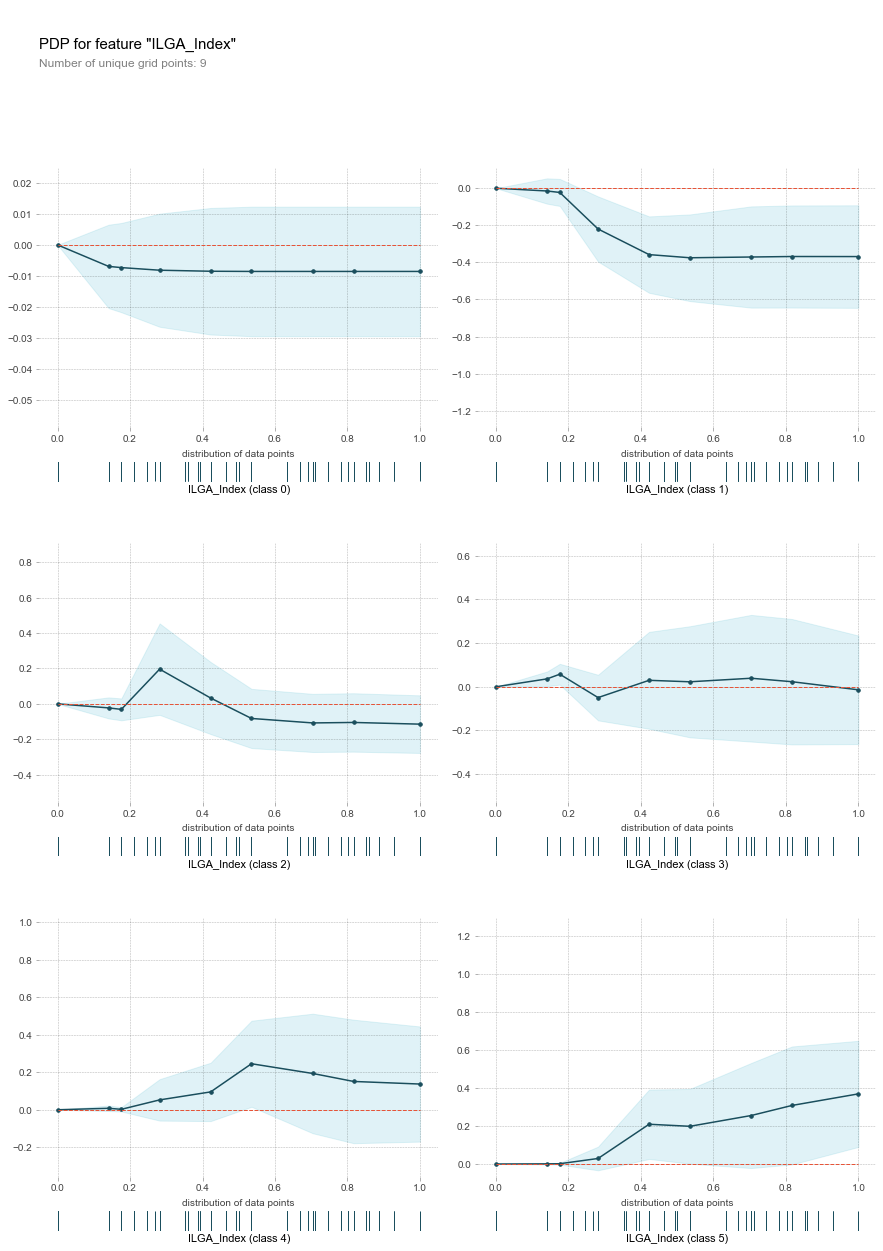

In [105]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature='ILGA_Index')
# pdp_goals = pdp.pdp_isolate(model=my_model, dataset=train_X, model_features=feature_names, feature='ILGA_Index')
pdp.pdp_plot(pdp_goals, 'ILGA_Index', plot_pts_dist=True)
# plt.savefig("D://毕业设计//result//机器学习//PDP//发病率ILGA.png",bbox_inches = 'tight')
plt.show()


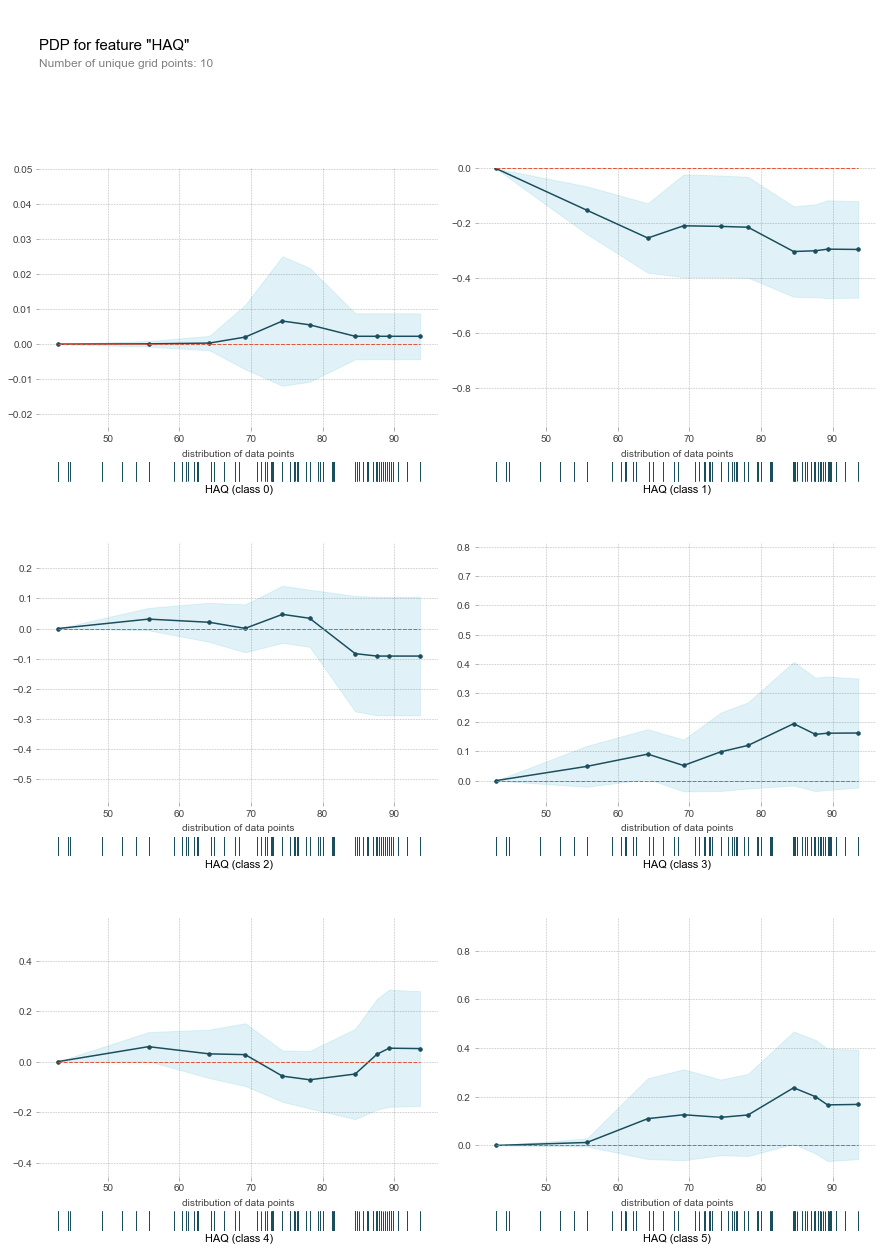

In [106]:
feature_to_plot = 'HAQ'
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
 
pdp.pdp_plot(pdp_dist, feature_to_plot, plot_pts_dist=True)
plt.show()


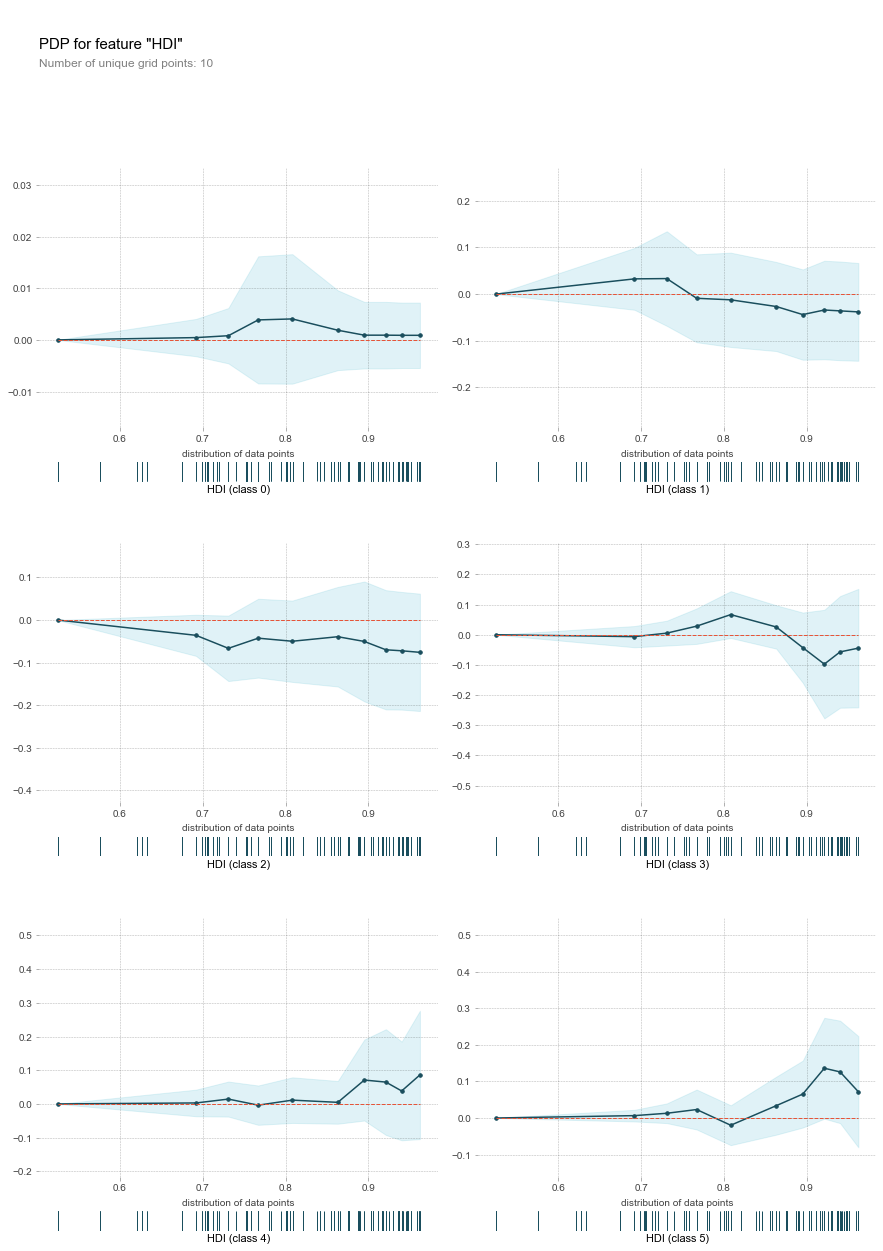

In [107]:
feature_to_plot = 'HDI'
pdp_dist = pdp.pdp_isolate(model=my_model, dataset=val_X, model_features=feature_names, feature=feature_to_plot)
 
pdp.pdp_plot(pdp_dist, feature_to_plot, plot_pts_dist=True)
plt.show()

In [108]:
from sklearn.datasets import load_boston  
# import sklearn.ensemble  
import numpy as np  
import lime  
import lime.lime_tabular  
  
boston = load_boston()  
data1 = pd.read_csv('D://毕业设计//result//机器学习//16week机器学习69countries.csv')
morbidity = data1.iloc[:,24]
X1 = data1.iloc[:,3:10]
feature_names = ['HDI','SDI','HAQ','health_GDP','ILGA_Index', 'Substance_use_disorders','Alcohol_consumption']
# print(feature_names)
# print(X)
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)  
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(  
    X1,   
    morbidity,   
    train_size=0.8)  
  
rf.fit(train, labels_train)  
print('Random Forest MSError', np.mean((rf.predict(test) - labels_test) ** 2))  
print('MSError when predicting the mean', np.mean((labels_train.mean() - labels_test) ** 2))  
print('MSError when predicting the mean', np.mean((labels_train.mean() - labels_test) ** 2))  
  
categorical_features = np.argwhere(np.array([len(set(boston.data[:,x]))   
                                             for x in range(boston.data.shape[1])]) <= 10).flatten()  
print(categorical_features)
x=np.array([3,10])
# explainer = lime.lime_tabular.LimeTabularExplainer(train,  
#                    feature_names=feature_names,  
#                    class_names=['Morbidity'],   
#                    categorical_features=categorical_features,   
#                    verbose=True, mode='regression')  
explainer = lime.lime_tabular.LimeTabularExplainer(train,  
                   feature_names=feature_names,  
                   class_names=['Morbidity'],   
                 categorical_features=x,
                   verbose=True, mode='regression')    
i = 25  
exp = explainer.explain_instance(test[i], rf.predict, num_features=5)  


Random Forest MSError 0.072697607920842
MSError when predicting the mean 8.203010760657019
MSError when predicting the mean 8.203010760657019
[3 8]


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
# rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000)  

  
# rf.fit(train, labels_train)  
# print('Random Forest MSError', np.mean((rf.predict(test) - labels_test) ** 2))  
# print('MSError when predicting the mean', np.mean((labels_train.mean() - labels_test) ** 2))  
# print('MSError when predicting the mean', np.mean((labels_train.mean() - labels_test) ** 2))  
  
# categorical_features = np.argwhere(np.array([len(set(data_input[:,x]))   
#                                              for x in range(data_input.shape[1])]) <= 10).flatten()  

explainer = lime.lime_tabular.LimeTabularExplainer(train_X, feature_names=feature_names, 
                                                   class_names=['0','1','2','3','4','5'], 
                                                   discretize_continuous=False,verbose=True, mode='classification')


  
# i = 25  
# exp = explainer.explain_instance(test[i], rf.predict, num_features=5)  
train_sample = train_X.sample(n=300)
train_sample

准确率 -> 92.31%
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        36
           2       0.91      0.91      0.91        43
           3       0.84      0.90      0.87        48
           4       0.88      0.83      0.85        42
           5       1.00      1.00      1.00        52

    accuracy                           0.92       221
   macro avg       0.93      0.92      0.92       221
weighted avg       0.92      0.92      0.92       221



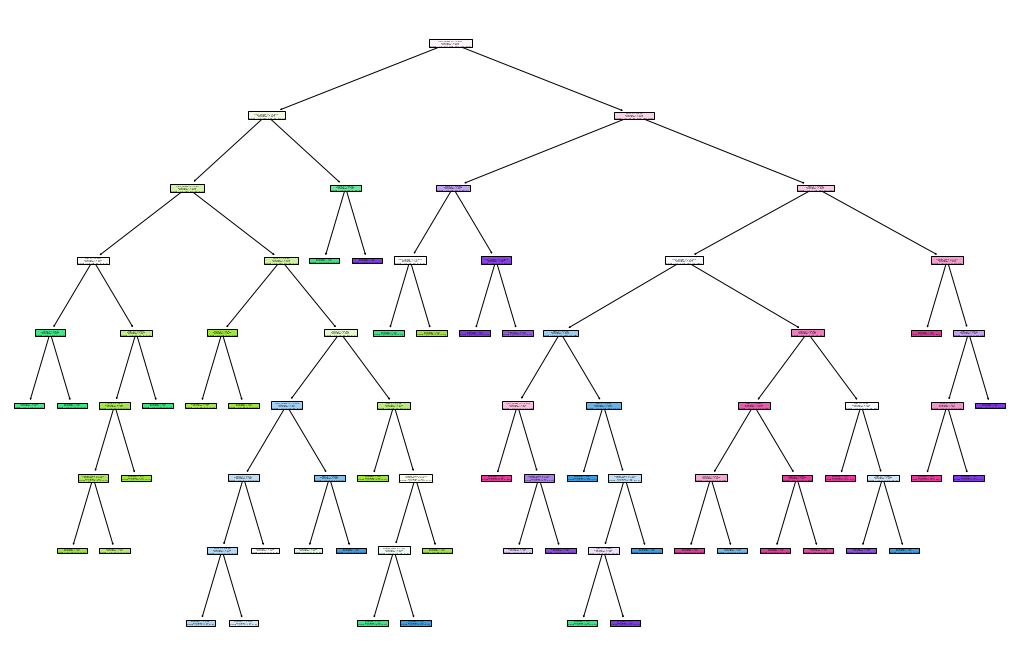

In [109]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier, plot_tree
# 训练 信息增益模型
my_model_2 = DecisionTreeClassifier(criterion='entropy')
my_model_2.fit(train_X, train_y)

# 测试
predict_target = my_model_2.predict(val_X)

#预测结果与真实结果的对比
myAcc = sum(predict_target == val_y)
print('准确率 -> {:.2f}%'.format(myAcc/len(val_y)*100))

#输出准确率，召回率，F值
print(metrics.classification_report(val_y, predict_target))
plt.figure(figsize=(18, 12))
plot_tree(my_model_2, filled=True,  feature_names=feature_names)
plt.show()

In [110]:


pred_p_1 = my_model.predict_proba(train_sample.values)
pred_p_2 = my_model_2.predict_proba(train_sample.values)
pred_1 = my_model.predict(train_sample.values)
pred_2 = my_model_2.predict(train_sample.values)
pred_p_1,pred_1,pred_p_2,pred_2



(array([[0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.]]),
 array([1, 5, 1, 4, 1, 5, 5, 5, 2, 5, 2, 2, 4, 1, 1, 3, 4, 3, 2, 5, 4, 3,
        1, 4, 2, 1, 2, 3, 4, 1, 4, 5, 3, 4, 5, 1, 5, 5, 3, 3, 3, 5, 2, 5,
        1, 5, 5, 1, 3, 2, 5, 4, 3, 4, 2, 2, 5, 3, 3, 3, 4, 5, 4, 3, 2, 4,
        1, 3, 2, 2, 3, 2, 1, 4, 5, 3, 3, 5, 4, 3, 2, 5, 5, 5, 2, 2, 5, 3,
        2, 5, 3, 2, 5, 1, 3, 1, 1, 3, 4, 4, 3, 1, 2, 1, 4, 5, 5, 3, 4, 1,
        5, 5, 1, 1, 1, 3, 1, 3, 5, 3, 5, 4, 4, 1, 5, 4, 4, 4, 3, 4, 2, 2,
        5, 5, 5, 4, 3, 2, 2, 2, 5, 4, 5, 4, 2, 4, 2, 5, 1, 4, 3, 5, 2, 1,
        2, 3, 5, 5, 5, 2, 3, 5, 1, 3, 3, 4, 1, 4, 2, 5, 1, 2, 4, 5, 1, 2,
        3, 1, 5, 5, 2, 1, 1, 1, 3, 5, 5, 4, 2, 5, 3, 2, 1, 1, 2, 2, 2, 2,
        3, 3, 1, 5, 1, 3, 5, 5, 1, 4, 5, 5, 3, 2, 1, 1, 5, 4, 5, 1, 3, 4,
        4, 4, 3, 5, 3, 2, 2, 1, 4, 4, 4, 

In [156]:
exp = explainer.explain_instance(train_sample.values[15], 
                                 my_model_2.predict_proba, 
                                 num_features=len(feature_names),  
                                 top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)


Intercept 0.21889872453494547
Prediction_local [0.25406387]
Right: 1.0


###### #决策树模型
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# # 训练 信息增益模型
# my_model_2 = DecisionTreeClassifier(criterion='entropy')
# my_model_2.fit(train_X, train_y)

# # 测试
# predict_target = my_model_2.predict(val_X)

# #预测结果与真实结果的对比
# myAcc = sum(predict_target == val_y)
# print('准确率 -> {:.2f}%'.format(myAcc/len(val_y)*100))

# #输出准确率，召回率，F值
# print(metrics.classification_report(val_y, predict_target))
# plt.figure(figsize=(18, 12))
# plot_tree(my_model_2, filled=True,  feature_names=feature_names)
# plt.show()


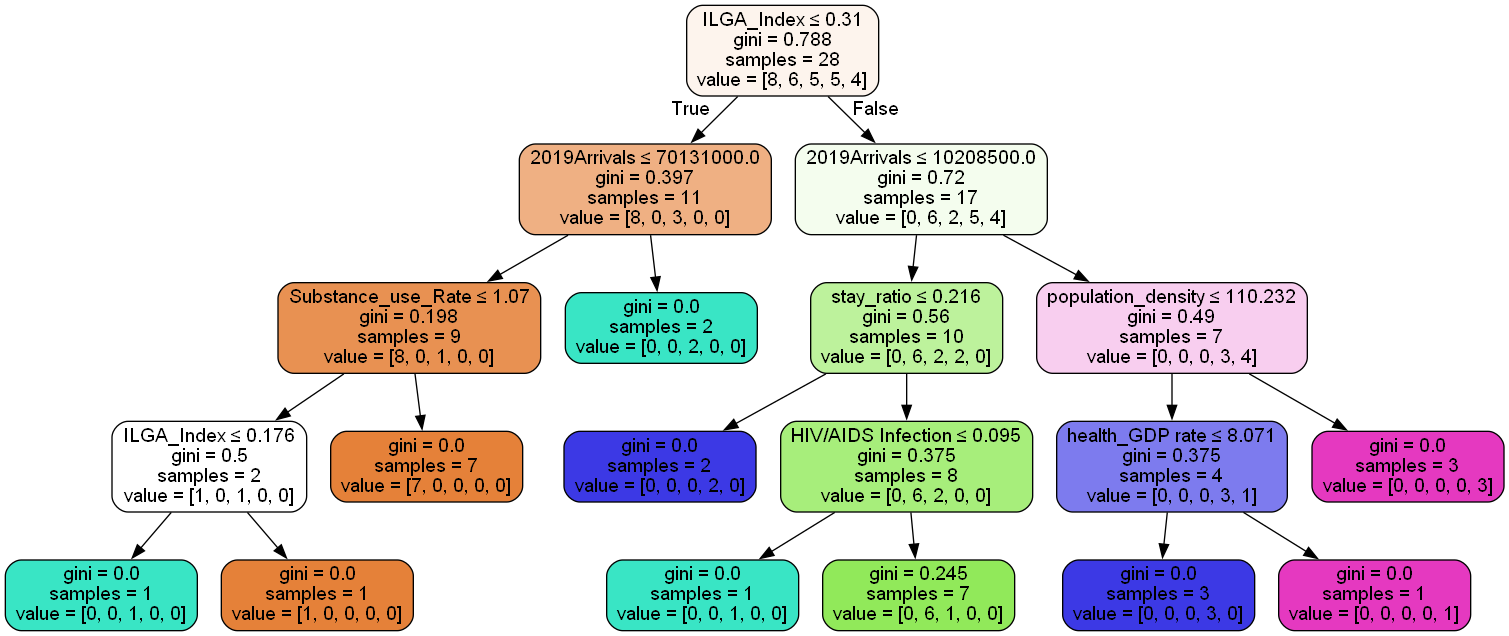

In [61]:
# #决策树剪枝
# from sklearn.model_selection import GridSearchCV
# from sklearn import tree
# from six import StringIO
# # from PIL import Image
# from IPython.display import Image
# #from PIL import Image as pil_image

# import pydotplus
# import os
# os.environ["PATH"] += os.pathsep + 'D://Graphviz//bin'  #注意修改你的路径

# params = {'max_depth': np.arange(2,12,2),
#           'max_leaf_nodes': np.arange(10,30,2),
#           'min_samples_split': [2,3,4],
#           'min_samples_leaf': [1,2]}
 
# clf = DecisionTreeClassifier(random_state=1)
# gcv = GridSearchCV(estimator=clf,param_grid=params)
# gcv.fit(train_X,train_y)
 
# model = gcv.best_estimator_
# model.fit(train_X,train_y)
 
# ## 可视化决策树经过剪剪枝后的树结构

# dot_data = StringIO()
# tree.export_graphviz(model, out_file=dot_data,
#                 feature_names=train_X.columns,
#                 filled=True, rounded=True,special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# Image(graph.create_png())


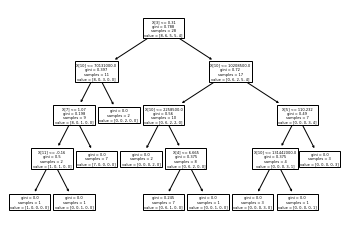

准确率 -> 43.84%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.60      0.83      0.70       269
           2       0.27      0.27      0.27       275
           3       0.40      0.32      0.35       283
           4       0.27      0.39      0.32       244
           5       0.69      0.43      0.53       335

    accuracy                           0.44      1421
   macro avg       0.37      0.37      0.36      1421
weighted avg       0.46      0.44      0.43      1421

ccp_alphas: [0.         0.03174603 0.04591837 0.05357143 0.06887755 0.09235209
 0.09285714 0.11452581 0.19544636]
impurities: [0.06122449 0.12471655 0.17063492 0.22420635 0.2930839  0.38543599
 0.47829314 0.59281895 0.78826531]


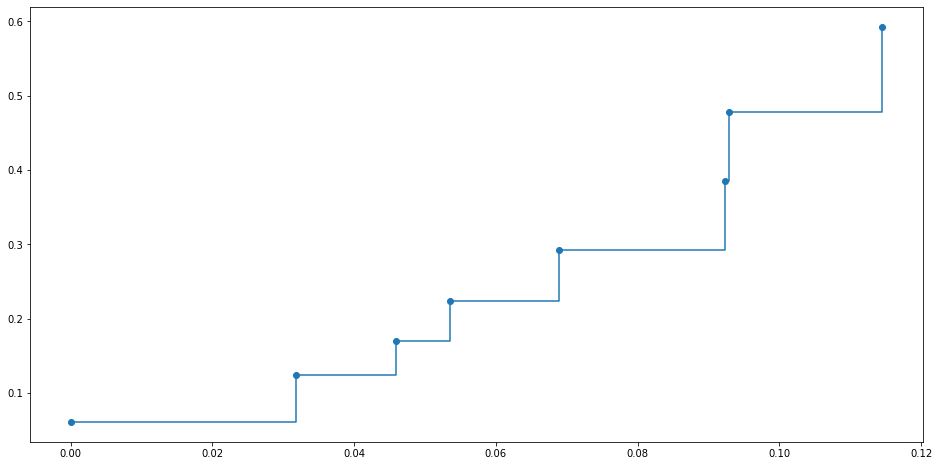

In [77]:

# gini_model = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')
# gini_model.fit(train_X,train_y)
# gini_y_pred = gini_model.predict(val_X)
# tree.plot_tree(gini_model)
# plt.show()
# #预测结果与真实结果的对比
# myAcc = sum(gini_y_pred == val_y)
# print('准确率 -> {:.2f}%'.format(myAcc/len(val_y)*100))
# #输出准确率，召回率，F值
# print(metrics.classification_report(val_y, gini_y_pred))

# # params = {'max_depth': np.arange(2,12,2),
# #           'max_leaf_nodes': np.arange(10,30,2),
# #           'min_samples_split': [2,3,4],
# #           'min_samples_leaf': [1,2]}
# # gcv1 = GridSearchCV(estimator=gini_model,param_grid=params)
# # gcv1.fit(train_X,train_y)
 
# # model1 = gcv1.best_estimator_
# # model1.fit(train_X,train_y)
# # dot_data = StringIO()
# # tree.export_graphviz(model1, out_file=dot_data,
# #                 feature_names=train_X.columns,
# #                 filled=True, rounded=True,special_characters=True)
# # graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# # Image(graph.create_png())


# path = gini_model.cost_complexity_pruning_path(train_X, train_y)
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
 
# fig, ax = plt.subplots(figsize=(16,8))
# ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
# print("ccp_alphas:",path['ccp_alphas'])
# print("impurities:",path['impurities'])

准确率 -> 40.25%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.68      0.67      0.68       269
           2       0.19      0.29      0.23       275
           3       0.30      0.24      0.26       283
           4       0.33      0.41      0.36       244
           5       0.69      0.43      0.53       335

    accuracy                           0.40      1421
   macro avg       0.37      0.34      0.34      1421
weighted avg       0.45      0.40      0.41      1421



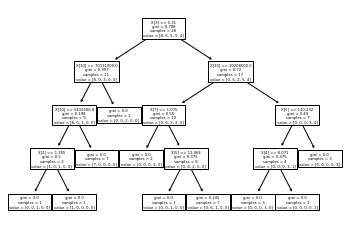

In [94]:
#设置alpha=0.04
clf_ccp = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best',random_state=1,ccp_alpha=0.01)
clf_ccp.fit(train_X,train_y)
#gini_model = DecisionTreeClassifier(criterion='gini',max_depth=4,splitter='best')

clf_ccp_y_pred = clf_ccp.predict(val_X)
#预测结果与真实结果的对比
myAcc = sum(clf_ccp_y_pred == val_y)
print('准确率 -> {:.2f}%'.format(myAcc/len(val_y)*100))
#输出准确率，召回率，F值
print(metrics.classification_report(val_y, clf_ccp_y_pred))

tree.plot_tree(clf_ccp)
plt.show()
